In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

plt.style.use('seaborn')

(1600, 6) (1600,)


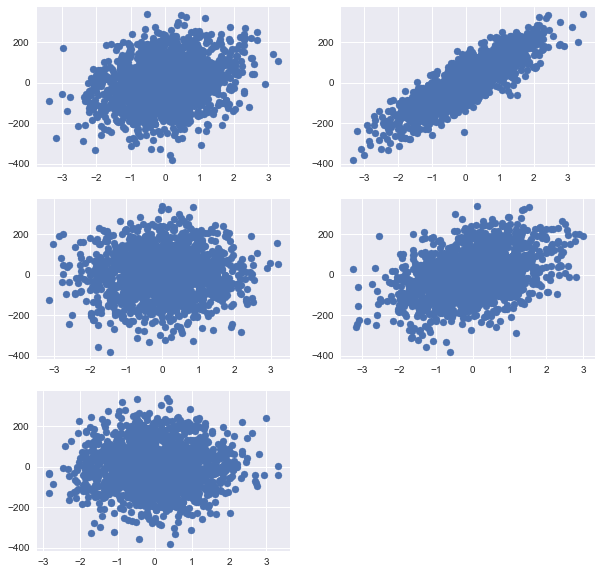

In [46]:
df=pd.read_csv('Datasets/Air_Quality_challenge/Train.csv')
y=df.values[:,-1]
x=df.values[:,:-1]

dummy_feature_x0=np.ones((x.shape[0],1))
x=np.hstack((dummy_feature_x0,x))
print(x.shape,y.shape)
# print(x)
plt.figure(figsize=(10,10))
for i in range(1,x.shape[1]):
    plt.subplot(3,2,i)
    plt.scatter(x[:,i],y)
plt.show()

In [47]:
def hypothesis(x,theta):
    return np.dot(x,theta)
def gradient(x,y,theta):
    y_=hypothesis(x,theta)
    grad=np.dot(x.T,(y_-y))
    return grad/x.shape[0]
def error(x,y,theta):
    y_=hypothesis(x,theta)
    return np.sum((y_-y)**2)/x.shape[0]
def gradientDescent(x,y,theta,learning_rate=0.1,max_steps=100):
    error_=[]
    for i in range(max_steps):
        grad=gradient(x,y,theta)
        theta=theta-learning_rate*grad
        error_.append(error(x,y,theta))
    return error_,theta
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score*100

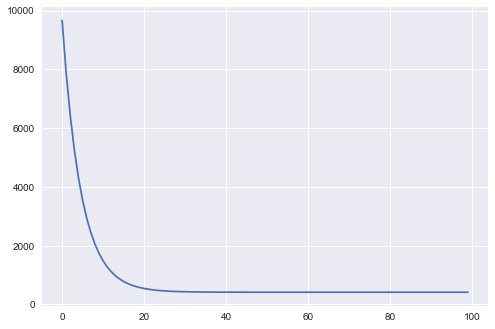

96.60939657403567


In [48]:
theta=np.ones((x.shape[1],))
error_,theta=gradientDescent(x,y,theta,0.1,100)

plt.plot(error_)
plt.show()

print(r2_score(y,hypothesis(x,theta)))

In [51]:
x=pd.read_csv('Datasets/Air_Quality_challenge/Test/Test.csv').values
dummy_feature_x0=np.ones((x.shape[0],1))
x=np.hstack((dummy_feature_x0,x))
y_=hypothesis(x,theta)

In [52]:
df=pd.DataFrame(y_,columns=['target'])
df.to_csv('air_quality_ypred.csv')